In [2]:
import boto3
import sys,os
sys.path.append("..")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from swampy import structshape as ss

### Ingest school directory dataset from S3

In [3]:
conn = boto3.client('s3')
local_dir_filename = 'directory_all.csv.bak'
if not os.path.exists('./' + local_dir_filename):
    conn.download_file('edu-data-bucket','directory/schools_ccd_directory.csv',local_dir_filename)

In [4]:
df0 = pd.read_csv(local_dir_filename,low_memory=False)

### Shape, datatype, missingness analysis

In [5]:
df0.shape, df0.dtypes

((3381565, 52),
 year                             int64
 ncessch                          int64
 ncessch_num                      int64
 school_id                      float64
 school_name                     object
 leaid                          float64
 lea_name                        object
 state_leaid                     object
 seasch                          object
 street_mailing                  object
 city_mailing                    object
 state_mailing                   object
 zip_mailing                     object
 street_location                 object
 city_location                   object
 state_location                  object
 zip_location                   float64
 phone                           object
 fips                           float64
 latitude                       float64
 longitude                      float64
 csa                            float64
 cbsa                           float64
 urban_centric_locale           float64
 county_code            

In [6]:
df0.head(n=3)

,year,ncessch,ncessch_num,school_id,school_name,leaid,lea_name,state_leaid,seasch,street_mailing,...,direct_certification,enrollment,ungrade_cedp,elem_cedp,middle_cedp,high_cedp,lunch_program,congress_district_id,state_leg_district_lower,state_leg_district_upper
0,1986,10000201704,10000201704,1704.0,CHALKVILLE CAMPUS,100002.0,DEPARTMENT OF YOUTH SERVICES,210,0020,NaN,...,NaN,129.0,0,0,1,1,NaN,NaN,NaN,NaN
1,1986,10000201705,10000201705,1705.0,MT MEIGS CAMPUS,100002.0,DEPARTMENT OF YOUTH SERVICES,210,0030,NaN,...,NaN,193.0,0,0,1,1,NaN,NaN,NaN,NaN
2,1986,10000201706,10000201706,1706.0,VACCA CAMPUS,100002.0,DEPARTMENT OF YOUTH SERVICES,210,0040,NaN,...,NaN,162.0,0,0,1,1,NaN,NaN,NaN,NaN


Observations
* There are many years and schools in this dataset that are not in the graduation rate dataset
* Ncessch and ncessch_num appear to be duplicates
* Features shared with the Adjusted Cohort dataset are
    * ncessch
    * school_name
    * leaid
    * lea_name
    * state_location
    * fips

In [7]:
pd.options.display.float_format = '{:.1f}'.format
df0.describe()

,year,ncessch,ncessch_num,school_id,leaid,zip_location,fips,latitude,longitude,csa,...,reduced_price_lunch,free_or_reduced_price_lunch,direct_certification,enrollment,ungrade_cedp,elem_cedp,middle_cedp,high_cedp,lunch_program,congress_district_id
count,3381565.0,3381565.0,3381565.0,3381071.0,3381071.0,2331863.0,3381441.0,2138873.0,2138876.0,714832.0,...,2234195.0,2252716.0,197537.0,3356268.0,3381565.0,3381565.0,3381565.0,3381565.0,499259.0,510036.0
mean,2003.7,293773792109.1,293773792109.1,89183.6,2937546.8,69066.3,29.3,35.8,-87.9,234.9,...,32.6,220.8,181.0,493.8,0.0,0.6,0.3,0.2,0.9,2892.7
std,10.0,165506835486.2,165506835486.2,570312.1,1654859.8,105615.9,16.6,10.5,26.0,188.9,...,43.7,254.1,185.3,436.1,0.1,0.5,0.5,0.4,0.9,1665.2
min,1986.0,10000200277.0,10000200277.0,0.0,100002.0,-2.0,1.0,-34.2,-966.7,-2.0,...,-3.0,-3.0,3.0,-3.0,0.0,0.0,0.0,0.0,-1.0,-2.0
25%,1995.0,170004505239.0,170004505239.0,633.0,1700045.0,29906.0,17.0,33.5,-98.5,-2.0,...,3.0,44.0,52.0,219.0,0.0,0.0,0.0,0.0,0.0,1309.0
50%,2004.0,291629000766.0,291629000766.0,1492.0,2916230.0,55108.0,29.0,38.5,-87.9,220.0,...,22.0,150.0,130.0,418.0,0.0,1.0,0.0,0.0,1.0,2902.0
75%,2012.0,421859000297.0,421859000297.0,3591.0,4218580.0,79415.0,42.0,41.6,-79.6,408.0,...,46.0,316.0,252.0,641.0,0.0,1.0,1.0,0.0,1.0,4212.0
max,2020.0,780003000037.0,780003000037.0,7800037.0,7800030.0,999500.0,78.0,96.8,145.8,566.0,...,4615.0,10848.0,3873.0,26335.0,1.0,1.0,1.0,1.0,5.0,7898.0


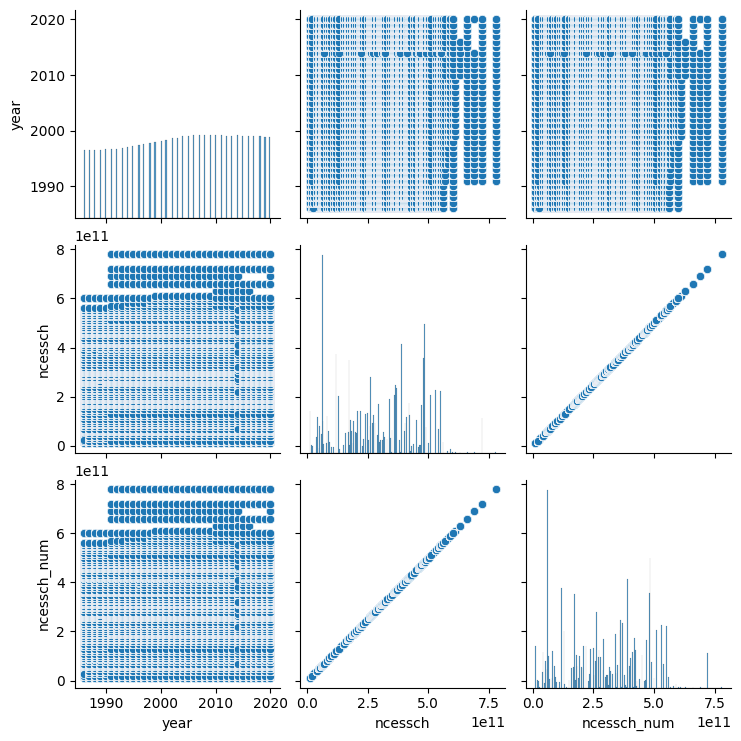

In [8]:
sns.pairplot(df0[['year','ncessch','ncessch_num']])

Strategy
* Since many years and schools are in this dataset that are not in the Adjusted Cohort dataset, we'll confirm that the ncessch and year combination are unique, and then subset this dataset to the portion of it that matches our adjusted cohort dataset.
* This way we are not studying data that cannot be merged with our dataset.

In [9]:
years = list(range(2010,2019))
our_years = df0.query('year in @years')
pd.set_option('display.max_columns',99)
our_years.head(n=3)

,year,ncessch,ncessch_num,school_id,school_name,leaid,lea_name,state_leaid,seasch,street_mailing,city_mailing,state_mailing,zip_mailing,street_location,city_location,state_location,zip_location,phone,fips,latitude,longitude,csa,cbsa,urban_centric_locale,county_code,school_level,school_type,school_status,lowest_grade_offered,highest_grade_offered,bureau_indian_education,title_i_status,title_i_eligible,title_i_schoolwide,charter,magnet,shared_time,virtual,teachers_fte,free_lunch,reduced_price_lunch,free_or_reduced_price_lunch,direct_certification,enrollment,ungrade_cedp,elem_cedp,middle_cedp,high_cedp,lunch_program,congress_district_id,state_leg_district_lower,state_leg_district_upper
2252826,2010,10000200277,10000200277,277.0,SEQUOYAH SCH - CHALKVILLE CAMPUS,100002.0,ALABAMA YOUTH SERVICES,210,0020,P O BOX 9486,BIRMINGHAM,AL,35220,RT 2 OLD SPRINGVILLE RD,PINSON,AL,36126.0,2056808574,1.0,33.7,-86.6,NaN,NaN,41.0,1073.0,3.0,4.0,1.0,7.0,12.0,0.0,-2.0,-2.0,-2.0,-2.0,0.0,0.0,NaN,0.0,-2.0,-2.0,-2.0,NaN,-2.0,0,0,1,1,NaN,NaN,NaN,NaN
2252827,2010,10000201402,10000201402,1402.0,EUFAULA SCH - EUFAULA CAMPUS,100002.0,ALABAMA YOUTH SERVICES,210,0025,315 OUTBACK ROAD,CLAYTON,AL,36016,315 OUTBACK RD,CLAYTON,AL,36016.0,3346874441,1.0,31.9,-85.2,NaN,NaN,42.0,1005.0,4.0,4.0,1.0,3.0,12.0,0.0,-2.0,-2.0,-2.0,-2.0,-1.0,-1.0,NaN,0.0,-2.0,-2.0,-2.0,NaN,-2.0,0,1,1,1,NaN,NaN,NaN,NaN
2252828,2010,10000201667,10000201667,1667.0,CAMPS,100002.0,ALABAMA YOUTH SERVICES,210,0050,P O BOX 66,MT MEIGS,AL,36057,INDUSTRIAL SCHOOL RD,MT MEIGS,AL,36057.0,3342153850,1.0,32.4,-86.1,NaN,NaN,41.0,1101.0,3.0,4.0,1.0,7.0,12.0,0.0,-2.0,-2.0,-2.0,-2.0,0.0,0.0,NaN,0.0,-2.0,-2.0,-2.0,NaN,-2.0,0,0,1,1,NaN,NaN,NaN,NaN
